In [3]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import napari

In [2]:
movie = tiff.imread("data/registered_full_movie.tif")

# Manual ROI Selection with Napari: Labeling Images

Identifying individual neurons in calcium imaging data is an essential step in extracting activity traces and understanding single-cell dynamics. This notebook introduces manual annotation tools in Napari, a viewer designed for biological image analysis. Each section covers a key step in the labeling process — from installation to exporting ROIs — and focuses on practical skills for working with single-cell imaging datasets.

### Setting Up Napari with Conda

This section focuses on setting up a working Python environment for loading and annotating calcium imaging data. Using Conda, we will install Napari and supporting libraries and verify that imaging data can be loaded and visualized. A consistent environment ensures that the annotation tools used throughout the workflow behave predictably.

**Sub-Sections:**

- **Create and Activate a Conda Environment for Imaging**  
  Isolates the environment to avoid package conflicts and maintain reproducibility.

- **Install Napari and Required Libraries**  
  Brings in essential tools (`napari`, `numpy`, `tifffile`) for data viewing and annotation.

- **Test Napari Standalone and in Notebooks**  
  Confirms that both interactive and notebook-based workflows are functional.

**Goal**: Create a dedicated environment, install required packages, and verify that you can open Napari.

**Exercise** Create and Activate a Conda Environment for Imaging

```bash
conda create -n napari-env python=3.9 -y
conda activate napari-env
```

**Exercise** Install Napari and Required Libraries

```bash
pip install "napari[all]"
pip install tifffile numpy matplotlib
````


**Exercise** Test Napari Standalone and in Notebook Mode

```bash
napari
```

**Exercise** Then, open a Jupyter notebook and run

```python
import napari
viewer = napari.Viewer()

```

### Annotating a Single Neuron (Manual ROI in Notebook)

This section focuses on identifying and labeling a single neuron in a calcium imaging dataset using Napari. We will generate a projection image to guide annotation, use the brush tool to create a labeled mask for one neuron, and export the mask for further analysis. Finally, we will apply the mask to the full movie to observe how fluorescence within the selected ROI changes over time. 

**Sub-Sections:**

- **Create and Open Summary Image in Napari (Mean or Max Projection)**  
  Generate a 2D projection of the movie and load it into Napari for clear visualization of cell boundaries.

- **Create a Labeled Mask for One Neuron (Brush and Paint Fill)**  
  Use the labels layer and brush tool to define the shape of a single neuron directly on the image.

- **Export Binary Mask**  
  Save the labeled mask as a binary image that can be reused or processed.

- **Open TIF Movie with Mask and Visualize How Neuron Within the ROI Changes Intensity**  
  Use the mask to extract a time trace of the neuron’s fluorescence and observe its activity over the imaging session.

**Goal**: Annotate a single neuron using a summary image, export a binary mask, and observe how the neuron’s signal evolves over time.


**Exercise** Create and Open Summary Image in Napari (Mean or Max Projection)

Generate a projection image and open it in Napari for annotation

In [38]:
viewer = napari.Viewer()

In [39]:
mean_proj = np.mean(movie, axis=0)
viewer.add_image(mean_proj, name="Mean Projection", colormap="gray")

<Image layer 'Mean Projection' at 0x105d9143e30>

In [40]:
median_proj = np.median(movie, axis=0)
viewer.add_image(median_proj, name="Median Projection", colormap="gray")

<Image layer 'Median Projection' at 0x105d7954c20>

In [41]:
max_proj = np.max(movie, axis=0)
viewer.add_image(max_proj, name="Maximum Projection", colormap="gray")

<Image layer 'Maximum Projection' at 0x105cafb73e0>

In [42]:
std_proj = np.max(movie, axis=0)
viewer.add_image(std_proj, name="Standard Deviation Projection", colormap="gray")

<Image layer 'Standard Deviation Projection' at 0x105dabdc290>

**Exercise** Create a Labeled Mask for One Neuron (Brush and Paint Fill)

Use the brush tool (press B or click the brush icon).

- Set label value to 1.
- Carefully paint over the cell body of the selected neuron.
- Optional: Use the paint bucket tool to fill enclosed regions.

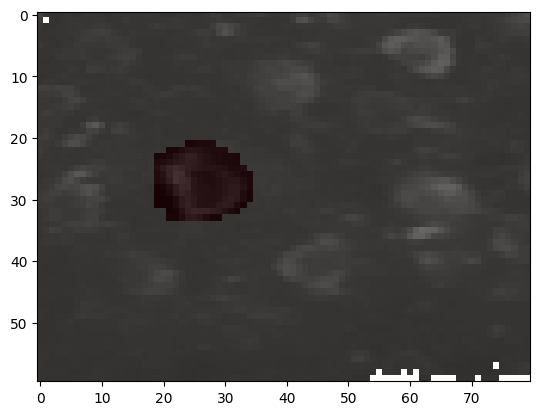

In [43]:
roi1 = viewer.layers['roi1'].data
plt.imshow(std_proj, cmap='gray')
plt.imshow(roi1, cmap='Reds', alpha=0.2);

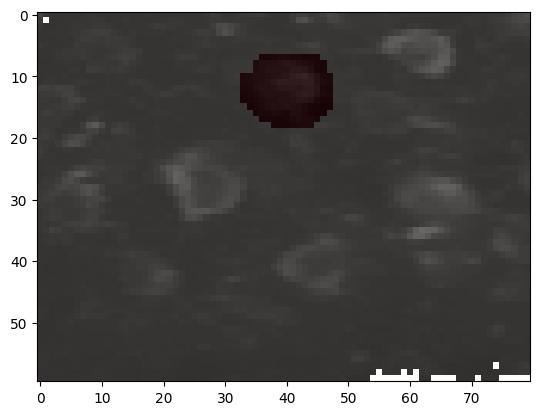

In [44]:
roi2 = viewer.layers['roi2'].data
plt.imshow(std_proj, cmap='gray')
plt.imshow(roi2, cmap='Reds', alpha=0.2);

**Exercise** Load ROI

In [ ]:
viewer.add_labels(roi1, name="ROI1")

<Labels layer 'ROI1' at 0x105dadefcb0>

In [50]:
viewer.add_labels(roi2, name="ROI2")

<Labels layer 'ROI2' at 0x105d91d97c0>

**Exercise** Open TIF Movie with Mask and Visualize How Neuron Within the ROI Changes Intensity

In [55]:
viewer = napari.Viewer()

In [56]:
viewer.add_image(movie, name="Full Movie", colormap="gray")
viewer.add_labels(roi1, name='ROI 1')

<Labels layer 'ROI 1' at 0x10584de4380>

In [57]:
viewer.add_labels(roi2, name='ROI 2')

<Labels layer 'ROI 2' at 0x105e0eff980>

### Annotating Multiple Neurons in a Field of View

This section covers how to label multiple neurons in a single imaging field using Napari’s annotation tools. Manual labeling of many cells is common when automated methods are unavailable or when human judgment is needed to resolve ambiguities. These ROIs can later be used for extracting fluorescence signals or training segmentation models.

**Goal**: Manually annotate multiple neurons using Napari’s labeling tools, organize them into a labeled image, and prepare the ROIs for later extraction or analysis.

In [58]:
viewer = napari.Viewer()

In [59]:
std_proj = np.std(movie, axis=0)
viewer.add_image(std_proj, name='Std Projection', colormap='gray')

<Image layer 'Std Projection' at 0x105dacb9250>

**Exercise** Label multiple neurons with unique IDs using the brush and fill tools

- *Zoom in on the first neuron*: Use your mouse or trackpad to zoom and center on a well-defined neuron in the projection image.
- *Select the brush tool*: Press B to switch to the brush tool, or click the brush icon in the left toolbar.
- *Set the brush size to match the size of the neuron*: 
  - Paint a rough outline of the neuron. 
  - Carefully paint over the neuron body. You do not need to be pixel-perfect — just close the contour.
- *Fill the enclosed ROI using the fill bucket*:
    - Press F to activate the paint bucket tool (fill).
    - Click inside the painted boundary to fill the entire neuron with label value 1.
- *Move to the next label index*:
    - Press M to increment the label index.
    - This will automatically update the label color, so the next neuron will appear in a new color.
- *Repeat steps 2–6 for each neuron*:
    - For each new neuron:
        - Paint its contour.
        - Use the fill tool to create a clean mask.
        - Press M to move to the next label index.
- *Review all labeled ROIs*: Zoom out and visually inspect the full image to ensure all labeled neurons are cleanly filled, with no overlaps or disconnected fragments.

**Exercise** Visually confirm that the ROI aligns with the neuron in the original image

In [60]:
labels = viewer.layers['roi'].data
labels.shape

(60, 80)

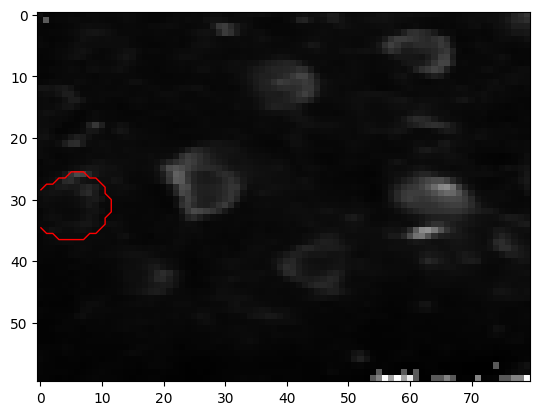

In [64]:
mask = (labels == 1)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r', linewidths=1)

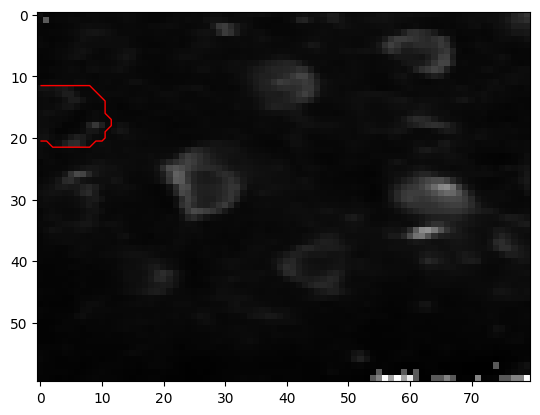

In [65]:
mask = (labels == 2)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r', linewidths=1)

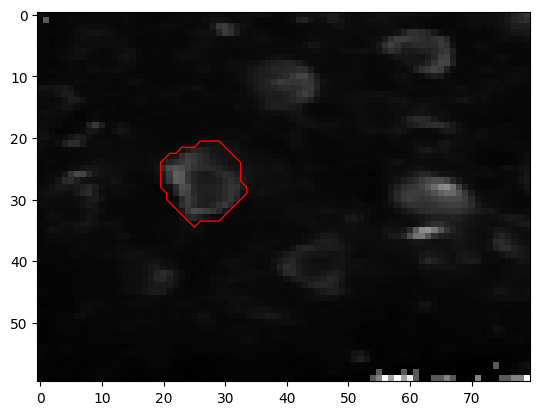

In [66]:
mask = (labels == 3)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r', linewidths=1)

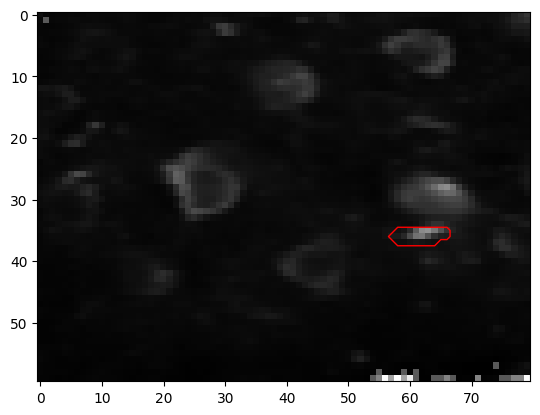

In [67]:
mask = (labels == 9)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r', linewidths=1)

**Exercise** Open TIF Movie with Mask and Visualize How Neuron Within the ROI Changes Intensity

In [72]:
viewer = napari.Viewer()

In [73]:
viewer.add_image(movie, name="Full Movie", colormap="gray")
viewer.add_labels(labels, name='ROI 1')

<Labels layer 'ROI 1' at 0x105871c9bb0>

### Exporting Your ROIs: Coordinates, Masks, and More

This section focuses on converting annotated ROIs into binary masks or coordinate data that can be used in further analysis. These representations make it possible to extract activity traces, apply quantitative metrics, or feed the labeled data into machine learning models.

**Sub-Sections:**

- **Access ROI Data from the Napari Viewer**  
  Retrieves shape outlines or labels directly from the viewer session.

- **Convert Polygons to Binary Masks for Signal Extraction**  
  Translates visual annotations into pixel-level data for processing.

- **Save Masks in TIFF or NumPy Format**  
  Produces files that can be used in custom pipelines or shared across platforms.

- **Overlay Masks on the Original Image for Verification**  
  Allows visual confirmation that the annotations align with the data.
